# Importing the required libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing the csv file to read the datasets

In [34]:
loc = "C:/Users/deept/Desktop/MSCSS/600 - IS/Submissions/Final_Submission/source-code/TCSS600/Users_Analysis_Prediction.csv"
metrics_user_pod1 = pd.read_csv(loc)

In [35]:
metrics_user_pod1.head()

,Time,CPU,Memory,Network_IO,Status
0,6/3/2020 21:42,0.000014,106.161386,10.565251,0
1,6/3/2020 21:44,0.000018,89.619380,15.839792,0
2,6/3/2020 21:46,0.000013,0.000000,12.152636,0
3,6/3/2020 21:48,0.000092,2248.441990,24.881395,0
4,6/3/2020 21:50,0.000112,2692.798134,32.730321,0


In [36]:
metrics_user_pod1.describe()

,CPU,Memory,Network_IO,Status
count,1364.000000,1364.000000,1364.000000,1364.000000
mean,0.001465,26563.370935,1074.921181,0.147361
std,0.003680,45313.360276,2686.754763,0.354595
min,0.000006,0.000000,8.545140,0.000000
25%,0.000014,243.000043,16.568834,0.000000
50%,0.000017,300.026180,19.342285,0.000000
75%,0.000020,78716.888630,22.893910,0.000000
max,0.011914,183850.902200,8775.899955,1.000000


# Insert the Nan rows with a zero value

In [37]:
metrics_user_pod1.dropna(0)

,Time,CPU,Memory,Network_IO,Status
0,6/3/2020 21:42,0.000014,106.161386,10.565251,0
1,6/3/2020 21:44,0.000018,89.619380,15.839792,0
2,6/3/2020 21:46,0.000013,0.000000,12.152636,0
3,6/3/2020 21:48,0.000092,2248.441990,24.881395,0
4,6/3/2020 21:50,0.000112,2692.798134,32.730321,0
...,...,...,...,...,...
1359,6/5/2020 19:00,0.011637,103071.698300,8513.075257,1
1360,6/5/2020 19:02,0.011669,103041.195200,8514.482242,1
1361,6/5/2020 19:04,0.011719,102521.050000,8535.116082,1
1362,6/5/2020 19:06,0.011707,104732.682500,8520.890337,1


In [38]:
metrics_user_pod1 = metrics_user_pod1.loc[metrics_user_pod1["Memory"] != 0, :]

In [39]:
metrics_user_pod1.describe()

,CPU,Memory,Network_IO,Status
count,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.001471,26680.734871,1079.602830,0.148012
std,0.003687,45378.912081,2691.761900,0.355242
min,0.000006,17.019862,8.545140,0.000000
25%,0.000014,244.627605,16.579193,0.000000
50%,0.000017,300.284848,19.346120,0.000000
75%,0.000020,78869.337680,22.913205,0.000000
max,0.011914,183850.902200,8775.899955,1.000000


# For identifying the realtionship between metrics

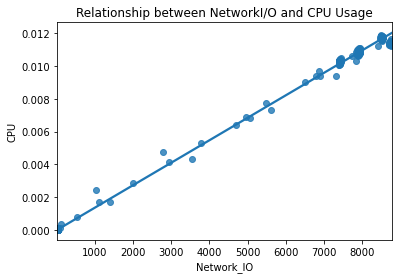

In [40]:
sns.regplot(x='Network_IO', y='CPU',data=metrics_user_pod1,fit_reg=True)
plt.title("Relationship between NetworkI/O and CPU Usage")
plt.show()

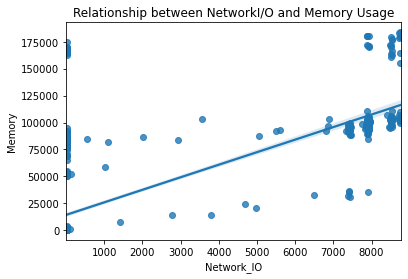

In [41]:
sns.regplot(x='Network_IO', y='Memory',data=metrics_user_pod1,fit_reg=True)
plt.title("Relationship between NetworkI/O and Memory Usage")
plt.show()

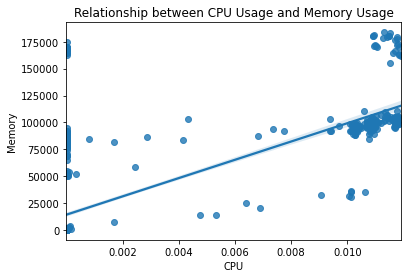

In [42]:
sns.regplot(x='CPU', y='Memory',data=metrics_user_pod1,fit_reg=True)
plt.title("Relationship between CPU Usage and Memory Usage")
plt.show()

# Plotting a Histogram for the CPU Usage Data

(array([152., 996.,  12.,   6.,   2.,   1.,   1.,   3.,   5., 180.]),
 array([-12.07855933, -11.3137116 , -10.54886387,  -9.78401615,
         -9.01916842,  -8.25432069,  -7.48947297,  -6.72462524,
         -5.95977751,  -5.19492979,  -4.43008206]),
 <a list of 10 Patch objects>)

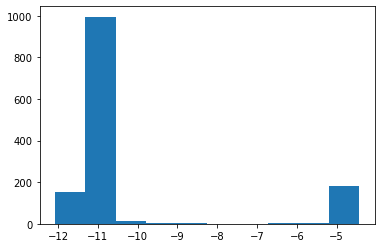

In [43]:
plt.hist(np.log(metrics_user_pod1.CPU))

In [44]:
metrics_user_pod1.columns

Index(['Time', 'CPU', 'Memory', 'Network_IO', 'Status'], dtype='object')

In [45]:
metrics_user_pod1_var_df = metrics_user_pod1.iloc[:,[1,2,3,4]]

In [46]:
metrics_user_pod1_var_df.head()

,CPU,Memory,Network_IO,Status
0,0.000014,106.161386,10.565251,0
1,0.000018,89.619380,15.839792,0
3,0.000092,2248.441990,24.881395,0
4,0.000112,2692.798134,32.730321,0
5,0.000035,533.770519,22.589536,0


# For determining the correlation between the metrics

In [47]:
metrics_user_pod1_var_df.corr()

,CPU,Memory,Network_IO,Status
CPU,1.000000,0.691641,0.999696,0.947073
Memory,0.691641,1.000000,0.692142,0.670556
Network_IO,0.999696,0.692142,1.000000,0.945877
Status,0.947073,0.670556,0.945877,1.000000


In [48]:
metrics_user_pod1_var_df

,CPU,Memory,Network_IO,Status
0,0.000014,106.161386,10.565251,0
1,0.000018,89.619380,15.839792,0
3,0.000092,2248.441990,24.881395,0
4,0.000112,2692.798134,32.730321,0
5,0.000035,533.770519,22.589536,0
...,...,...,...,...
1359,0.011637,103071.698300,8513.075257,1
1360,0.011669,103041.195200,8514.482242,1
1361,0.011719,102521.050000,8535.116082,1
1362,0.011707,104732.682500,8520.890337,1


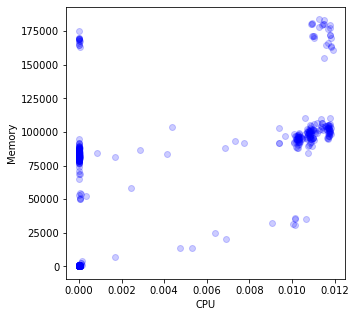

In [49]:
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(metrics_user_pod1_var_df["CPU"], metrics_user_pod1_var_df["Memory"], color='b', alpha=0.20)
ax.set_xlabel('CPU')
ax.set_ylabel('Memory')
plt.show()

In [50]:
model = ols('Status ~ CPU + Memory + Network_IO',metrics_user_pod1_var_df).fit()

In [51]:
print(model.summary())

OLS Regression Results                            
Dep. Variable:                 Status   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4010.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:20:01   Log-Likelihood:                 1034.6
No. Observations:                1358   AIC:                            -2061.
Df Residuals:                    1354   BIC:                            -2040.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0113      0.004      3.169      0.002       0.004       0.018
C

In [52]:
predicted_status = model.fittedvalues

In [53]:
predicted_status

0       0.012462
1       0.012457
3       0.028500
4       0.031761
5       0.015225
          ...   
1359    1.070500
1360    1.077704
1361    1.085210
1362    1.085976
1363    1.078324
Length: 1358, dtype: float64

# Plotting CPU vs. Predicted Status

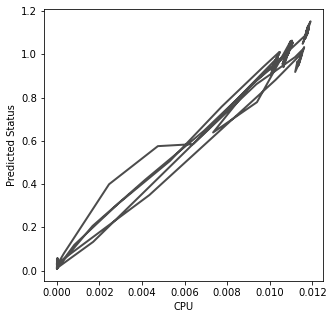

In [54]:
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.plot(metrics_user_pod1_var_df.CPU, predicted_status, color='black', alpha=0.70, linewidth=2)
ax.set_xlabel('CPU')
ax.set_ylabel('Predicted Status')
plt.show()

# Plotting Actual Status vs. Predicted Status

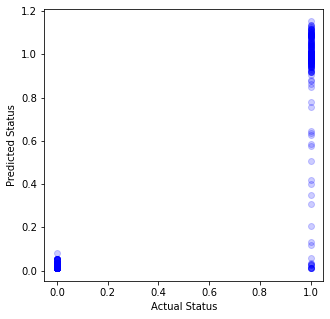

In [55]:
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(metrics_user_pod1_var_df.Status, predicted_status, color='b', alpha=0.20)
ax.set_xlabel('Actual Status')
ax.set_ylabel('Predicted Status')
plt.show()

# Check the Error Rate of the Prediction Model

In [56]:
error = np.sqrt(mean_squared_error(metrics_user_pod1_var_df.Status,predicted_status))

In [57]:
error

0.11295196198547636

# Predicting using Linear Regression To cross check the previous prediction

In [58]:
x=metrics_user_pod1_var_df.drop('Status',axis=1)
y=metrics_user_pod1_var_df['Status']

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = .3,random_state=3)

In [60]:
LinReg = LinearRegression()

In [61]:
LinReg.fit(X_train,Y_train)

LinearRegression()

In [62]:
Y_pred = LinReg.predict(X_test)

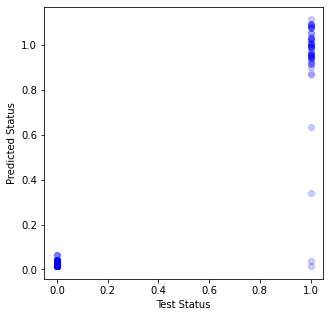

In [63]:
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(Y_test,Y_pred, color='b', alpha=0.20)
ax.set_xlabel('Test Status')
ax.set_ylabel('Predicted Status')
plt.show()

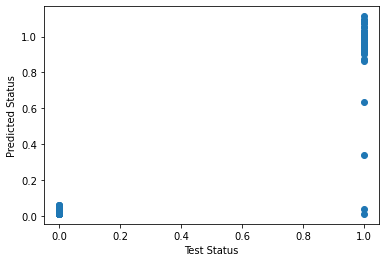

In [64]:
ax = plt.axes();
ax.scatter(Y_test,Y_pred)
ax.set_xlabel('Test Status')
ax.set_ylabel('Predicted Status')
plt.show()